In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp
from scipy import stats

In [6]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_2.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="bodyweight")
df = pd.DataFrame(rows, columns=header)

In [8]:
df

,Mouse,Sex,Diet,Sucrose,2024-04-02 00:00:00,2024-04-06 00:00:00,2024-04-09 00:00:00,Mean bw,Group,Food,None,None,None,None,None,None,None
0,B3209,Female,control,Yes,19.1,19.9,19.4,19.466667,1,2.333333,None,NaN,Females,None,Mean,SD,Food mean
1,B3210,Female,control,Yes,20.9,21.7,22.2,21.600000,1,2.966667,None,1.0,Control,Sucrose,20.488889,0.846868,2.733333
2,B3213,Female,control,Yes,21.0,20.0,20.0,20.333333,1,2.766667,None,2.0,ND,Sucrose,20.444444,0.586768,2.866667
3,B3214,Female,control,Yes,19.8,19.7,19.6,19.700000,1,3.433333,None,3.0,Control,No sucrose,20.55,0.720417,2.772222
4,B3217,Female,control,Yes,22.3,20.3,19.0,20.533333,1,2.066667,None,4.0,ND,No sucrose,20.555556,0.508884,2.872222
5,B3218,Female,control,Yes,20.1,22.0,21.8,21.300000,1,2.833333,None,NaN,None,None,None,None,None
6,B3219,Female,experimental,Yes,19.6,20.5,21.1,20.400000,2,2.700000,None,NaN,None,None,None,None,None
7,B3220,Female,experimental,Yes,19.6,19.9,20.4,19.966667,2,2.833333,None,NaN,Males,None,None,None,None
8,B3221,Female,experimental,Yes,20.6,20.6,20.3,20.500000,2,2.733333,None,5.0,Control,Sucrose,25.677778,0.682696,3.305556
9,B3222,Female,experimental,Yes,19.5,19.9,19.5,19.633333,2,2.900000,None,6.0,ND,Sucrose,25.805556,0.999426,3.105556


ValueError: could not broadcast input array from shape (48,7) into shape (48,)

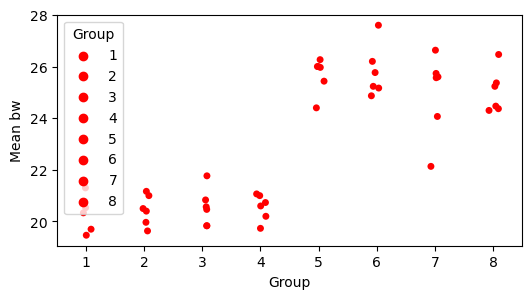

In [21]:
# Check if the "Group" column is categorical and convert it if necessary
df['Group'] = df['Group'].astype('category')

# Generate figure with one subplot
f, ax = plt.subplots(figsize=(6, 3))

# Plot today's data in the subplot
palette = ["red", "red", "red", "red", "red", "red", "red", "red"]

sns.stripplot(data=df, x="Group", y="Mean bw", hue="Group", palette=palette, ax=ax)
sns.pointplot(data=df, x='Group', y='Mean bw', capsize=.2, color="grey", markers='o', join=False, ax=ax)

# Set x-axis labels
group_labels = ["F Control + S", "F Exp + S", "F Control", "F Exp", "M Control + S", "M Exp + S", "M Control", "M Exp"]
ax.set_xticklabels(group_labels)
ax.set_xlabel("Groups")

# Set y-axis label
ax.set_ylabel("Mean bodyweight")

# Set legend title
ax.legend(title='Groups')

# Show the plot
plt.show()
